### General Analysis of Suicide Rates

Our aim is to make general analysis of suicide rates and we will explain these rates in detail.

Dataset Feature List:

    country
    year
    sex
    age
    suicides_no
    population
    suicides/100k pop
    country-year
    HDI for year
    gdp_for_year
    gdp_per_capita
    generation

### checking out the data

In [17]:
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot

In [1]:
import numpy as np 
import pandas as pd 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data=pd.read_csv('master.csv')

data.sample(frac = 0.1) # random rows from dataset

country  year     sex          age  suicides_no  population  \
10675       Grenada  2014  female    75+ years            0        2222   
24626        Sweden  2008  female  55-74 years           88     1033770   
1439      Australia  1986    male  25-34 years          367     1317500   
13125         Italy  2013    male  55-74 years         1039     6636981   
3324        Belarus  2001    male  15-24 years          313      801574   
...             ...   ...     ...          ...          ...         ...   
10261        Greece  2004  female   5-14 years            0      526979   
12327       Ireland  2007  female  15-24 years           15      313405   
18754      Paraguay  2003  female  55-74 years            1      219923   
25917  Turkmenistan  2003    male  55-74 years           11      144973   
13208       Jamaica  1989  female  15-24 years            0      253081   

       suicides/100k pop      country-year  HDI for year  gdp_for_year ($)   \
10675               0.00       Grenada2014         0.750        911,481,481   
24626               8.51        Sweden2008           NaN    513,965,650,650   
1439               27.86     Australia1986           NaN    181,977,476,217   
13125              15.65         Italy2013         0.873  2,130,491,320,659   
3324               39.05       Belarus2001           NaN     12,354,820,144   
...                  ...               ...           ...                ...   
10261               0.00        Greece2004           NaN    240,521,260,988   
12327               4.79       Ireland2007           NaN    269,917,519,847   
18754               0.45      Paraguay2003           NaN      6,588,103,836   
25917               7.59  Turkmenistan2003           NaN      5,977,560,877   
13208               0.00       Jamaica1989           NaN      4,404,970,059   

       gdp_per_capita ($)    generation  
10675                9456        Silent  
24626               59155        Silent  
1439                12288       Boomers  
13125               37050       Boomers  
3324                 1299    Millenials  
...                   ...           ...  
10261               22804    Millenials  
12327               67032    Millenials  
18754                1339        Silent  
25917                1431        Silent  
13208                2087  Generation X  

[2782 rows x 12 columns]

In [5]:
data.describe()

year   suicides_no    population  suicides/100k pop  \
count  27820.000000  27820.000000  2.782000e+04       27820.000000   
mean    2001.258375    242.574407  1.844794e+06          12.816097   
std        8.469055    902.047917  3.911779e+06          18.961511   
min     1985.000000      0.000000  2.780000e+02           0.000000   
25%     1995.000000      3.000000  9.749850e+04           0.920000   
50%     2002.000000     25.000000  4.301500e+05           5.990000   
75%     2008.000000    131.000000  1.486143e+06          16.620000   
max     2016.000000  22338.000000  4.380521e+07         224.970000   

       HDI for year  gdp_per_capita ($)  
count   8364.000000        27820.000000  
mean       0.776601        16866.464414  
std        0.093367        18887.576472  
min        0.483000          251.000000  
25%        0.713000         3447.000000  
50%        0.779000         9372.000000  
75%        0.855000        24874.000000  
max        0.944000       126352.000000

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
country               27820 non-null object
year                  27820 non-null int64
sex                   27820 non-null object
age                   27820 non-null object
suicides_no           27820 non-null int64
population            27820 non-null int64
suicides/100k pop     27820 non-null float64
country-year          27820 non-null object
HDI for year          8364 non-null float64
 gdp_for_year ($)     27820 non-null object
gdp_per_capita ($)    27820 non-null int64
generation            27820 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [8]:
data.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

**changing names of columns. Because there may be problems for future analysis.**

In [4]:
data=data.rename(columns={'country':'Country','year':'Year','sex':'Gender','age':'Age','suicides_no':'SuicidesNo','population':'Population','suicides/100k pop':'Suicides100kPop','country-year':'CountryYear','HDI for year':'HDIForYear',' gdp_for_year ($) ':'GdpForYearMoney','gdp_per_capita ($)':'GdpPerCapitalMoney','generation':'Generation'})

In [10]:
data.columns

Index(['Country', 'Year', 'Gender', 'Age', 'SuicidesNo', 'Population',
       'Suicides100kPop', 'CountryYear', 'HDIForYear', 'GdpForYearMoney',
       'GdpPerCapitalMoney', 'Generation'],
      dtype='object')

In [11]:
# no of rows and columns 
print('Data Shape :', data.shape)

Data Shape : (27820, 12)


In [14]:
data.isnull().any()

Country               False
Year                  False
Gender                False
Age                   False
SuicidesNo            False
Population            False
Suicides100kPop       False
CountryYear           False
HDIForYear             True
GdpForYearMoney       False
GdpPerCapitalMoney    False
Generation            False
dtype: bool

**missing data in HDIForYear. let's check how many data is missing**

In [15]:
data.isnull().sum()

Country                   0
Year                      0
Gender                    0
Age                       0
SuicidesNo                0
Population                0
Suicides100kPop           0
CountryYear               0
HDIForYear            19456
GdpForYearMoney           0
GdpPerCapitalMoney        0
Generation                0
dtype: int64

**most of the HDIForYear value is empty, so dropping it.**

In [16]:
data=data.drop(['HDIForYear'],axis=1)

### starting the analysis

In [9]:
# min_year=min(data.Year)
# max_year=max(data.Year)

# print('Min Year :',min_year)
# print('Max Year :',max_year)

# #1985 min year,2016 max year.

# data_country=data[(data['Year']==min_year)]

# country_1985=data[(data['Year']==min_year)].Country.unique()
# country_1985_male=[]
# country_1985_female=[]

# for country in country_1985:
#     country_1985_male.append(len(data_country[(data_country['Country']==country)&(data_country['Gender']=='male')]))
#     country_1985_female.append(len(data_country[(data_country['Country']==country)&(data_country['Gender']=='female')])) 
    
# # found the ratio of men and women who committed suicide in some countries in 1985 and we are now plotting chart.

# plt.figure(figsize=(10,10))
# sns.barplot(y=country_1985,x=country_1985_male,color='red')
# sns.barplot(y=country_1985,x=country_1985_female,color='yellow')
# plt.ylabel('Countries')
# plt.xlabel('Count Male vs Female')
# plt.title('1985 Year Suicide Rate Gender')
# plt.show()

# #Very odd all the rates came on an equal level. So let's do max year.

# data_country=data[(data['Year']==max_year)]

# country_2016=data[(data['Year']==max_year)].Country.unique()
# country_2016_male=[]
# country_2016_female=[]

# for country in country_2016:
#     country_2016_male.append(len(data_country[(data_country['Country']==country)&(data_country['Gender']=='male')]))
#     country_2016_female.append(len(data_country[(data_country['Country']==country)&(data_country['Gender']=='female')])) 
    
# # found the ratio of men and women who committed suicide in some countries in 2016 and we are now plotting chart.

# plt.figure(figsize=(10,10))
# sns.barplot(y=country_2016,x=country_2016_male,color='red')
# sns.barplot(y=country_2016,x=country_2016_female,color='yellow')
# plt.ylabel('Countries')
# plt.xlabel('Count Male vs Female')
# plt.title('2016 Year Suicide Rate Gender')
# plt.show()

# **While the suicide rate was widespread in more countries in 1985, this ratio has fallen in 2016. Now let us examine the other features of these countries.**

In [ ]:
# data_country=data[(data['Year']==min_year)]

# country_1985_population=[]

# for country in country_1985:
#     country_1985_population.append(sum(data_country[(data_country['Country']==country)].Population))    

# #Now for the year 1985, finding sum population of every country

# plt.figure(figsize=(10,10))
# sns.barplot(y=country_1985,x=country_1985_population)
# plt.xlabel('Population Count')
# plt.ylabel('Countries')
# plt.title('1985 Year Sum Population for Suicide Rate')
# plt.show()

# #######################################################

# data_country=data[(data['Year']==max_year)]

# country_2016_population=[]

# for country in country_2016:
#     country_2016_population.append(sum(data_country[(data_country['Country']==country)].Population))    

# #Now for the year 2016, finding sum population of every country

# plt.figure(figsize=(10,10))
# sns.barplot(y=country_2016,x=country_2016_population)
# plt.xlabel('Population Count')
# plt.ylabel('Countries')
# plt.title('2016 Year Sum Population for Suicide Rate')
# plt.show()

#### total number of suicides for male and female of each countries

In [19]:
suicideGender1985=data_country.groupby(['Country','Gender']).SuicidesNo.sum()

print(suicideGender1985)

Country         Gender
Armenia         female      14
                male        53
Austria         female     295
                male       906
Croatia         female     168
                male       515
Cyprus          female       5
                male        31
Czech Republic  female     258
                male      1060
Grenada         female       0
                male         0
Hungary         female     446
                male      1315
Iceland         female       4
                male        36
Lithuania       female     129
                male       693
Mauritius       female      15
                male        83
Mongolia        female      52
                male       371
Netherlands     female     613
                male      1273
Qatar           female       5
                male        63
Romania         female     310
                male      1643
Sweden          female     348
                male       782
Thailand        female     842
                

In [20]:
data_country=data[(data['Year']==min_year)]

data_age_5_14=[]
data_age_15_24=[]
data_age_25_34=[]
data_age_35_54=[]
data_age_55_74=[]
data_age_75=[]

for country in country_1985:
        data_age_5_14.append(len(data_country[(data_country['Country']==country)&(data_country['Age']=='5-14 years')]))
        data_age_15_24.append(len(data_country[(data_country['Country']==country)&(data_country['Age']=='15-24 years')]))
        data_age_25_34.append(len(data_country[(data_country['Country']==country)&(data_country['Age']=='25-34 years')]))
        data_age_35_54.append(len(data_country[(data_country['Country']==country)&(data_country['Age']=='35-54 years')]))
        data_age_55_74.append(len(data_country[(data_country['Country']==country)&(data_country['Age']=='55-74 years')]))
        data_age_75.append(len(data_country[(data_country['Country']==country)&(data_country['Age']=='75+ years')]))
        

#######################################################

data_country=data[(data['Year']==max_year)]

data_age_5_14=[]
data_age_15_24=[]
data_age_25_34=[]
data_age_35_54=[]
data_age_55_74=[]
data_age_75=[]

for country in country_2016:
        data_age_5_14.append(len(data_country[(data_country['Country']==country)&(data_country['Age']=='5-14 years')]))
        data_age_15_24.append(len(data_country[(data_country['Country']==country)&(data_country['Age']=='15-24 years')]))
        data_age_25_34.append(len(data_country[(data_country['Country']==country)&(data_country['Age']=='25-34 years')]))
        data_age_35_54.append(len(data_country[(data_country['Country']==country)&(data_country['Age']=='35-54 years')]))
        data_age_55_74.append(len(data_country[(data_country['Country']==country)&(data_country['Age']=='55-74 years')]))
        data_age_75.append(len(data_country[(data_country['Country']==country)&(data_country['Age']=='75+ years')]))


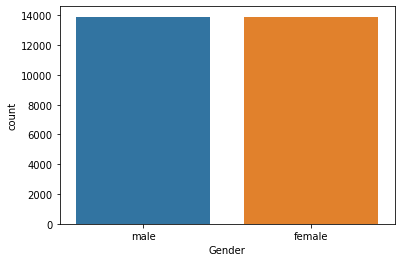

In [21]:
sns.countplot(data.Gender)

plt.show()


**distribution of suicide according to gender**

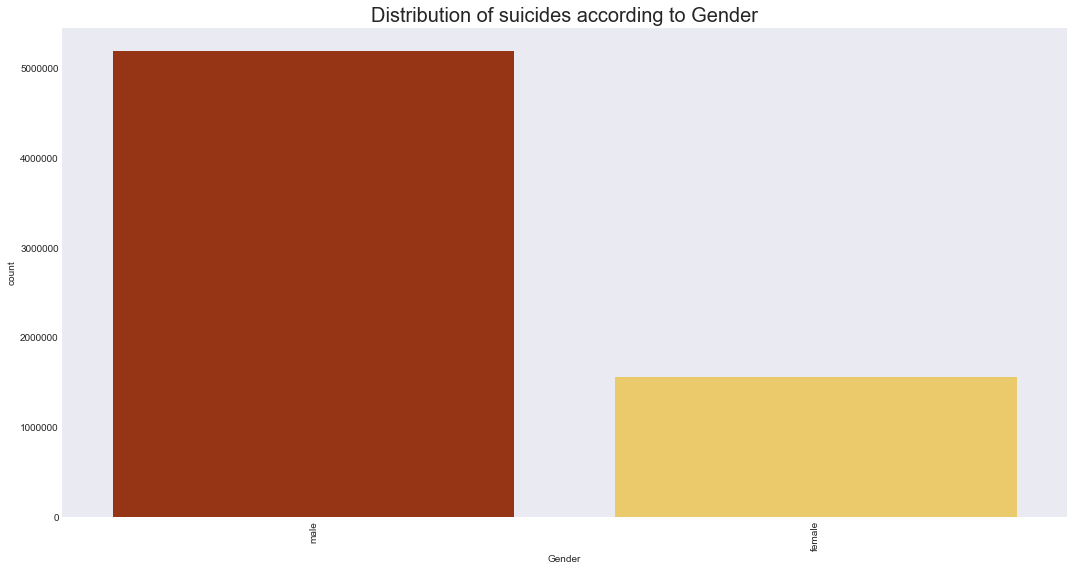

In [14]:
plt.style.use('seaborn-dark')
plt.rcParams['figure.figsize'] = (18, 9)

x = pd.DataFrame(data.groupby(['Gender'])['SuicidesNo'].sum().reset_index())
x.sort_values(by = ['SuicidesNo'], ascending = False, inplace = True)

sns.barplot(x['Gender'], y = x['SuicidesNo'], data = x, palette = 'afmhot')
plt.title('Distribution of suicides according to Gender', fontsize = 20)
plt.xlabel('Gender')
plt.xticks(rotation = 90)
plt.ylabel('count')
plt.show()

**Geospatial analysis for suicide**

In [18]:
suicide = pd.DataFrame(data.groupby(['Country','Year'])['SuicidesNo'].sum().reset_index())

count_max_sui=pd.DataFrame(suicide.groupby('Country')['SuicidesNo'].sum().reset_index())

count = [ dict(
        type = 'choropleth',
        locations = count_max_sui['Country'],
        locationmode='country names',
        z = count_max_sui['SuicidesNo'],
        text = count_max_sui['Country'],
        colorscale = 'Cividis',
        autocolorscale = False,
        reversescale = True,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
)]
layout = dict(
    title = 'Suicides happening across the Globe',
    geo = dict(
        showframe = True,
        showcoastlines = True,
        projection = dict(
            type = 'orthographic'
        )
    )
)
fig = dict( data=count, layout=layout )
iplot(fig, validate=False, filename='d3-world-map')

**there has been an even gender distribution.**

In [8]:
print("Max : ",max(data['GdpPerCapitalMoney'].unique()))

print('Min : ',min(data['GdpPerCapitalMoney'].unique()))

Max :  126352
Min :  251


In [ ]:
# sns.countplot(data[data['GdpPerCapitalMoney']==251].Gender)
# plt.title("GdpPerCapitalMoney Gender (Male-Female)")
# plt.show()

In [ ]:
# sns.countplot(data[data['GdpPerCapitalMoney']==126352].Gender)
# plt.title("GdpPerCapitalMoney Gender (Male-Female)")
# plt.show()

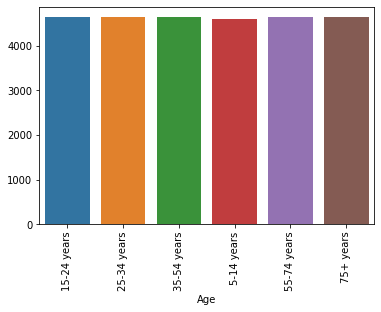

In [26]:
sns.barplot(x=data.groupby('Age')['Gender'].count().index,y=data.groupby('Age')['Gender'].count().values)
plt.xticks(rotation=90)
plt.show()

**top 15 countries in suicide**

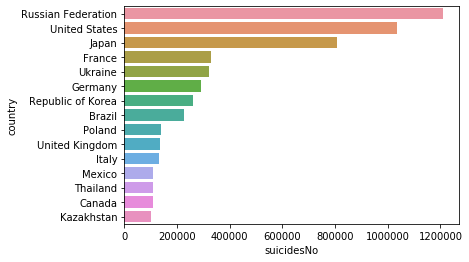

In [27]:
suicidesNo=[]

for country in data.Country.unique():
    suicidesNo.append(sum(data[data['Country']==country].SuicidesNo))   
    
suicidesNo=pd.DataFrame(suicidesNo,columns=['suicidesNo'])
country=pd.DataFrame(data.Country.unique(),columns=['country'])
data_suicide_countr=pd.concat([suicidesNo,country],axis=1)

data_suicide_countr=data_suicide_countr.sort_values(by='suicidesNo',ascending=False)

sns.barplot(y=data_suicide_countr.country[:15],x=data_suicide_countr.suicidesNo[:15])

plt.show()

**visualising the different year distribution**

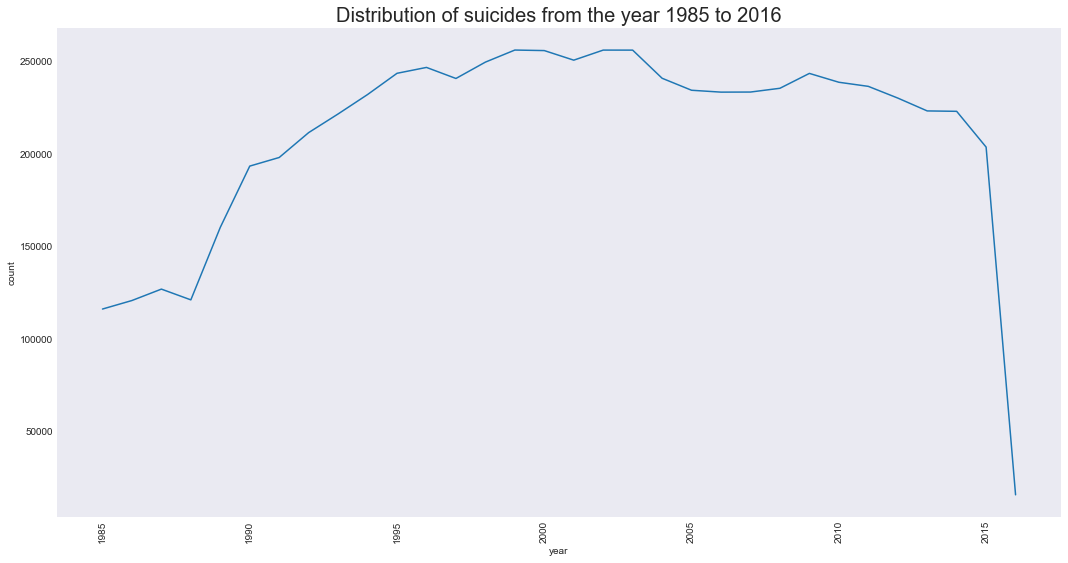

In [12]:
plt.style.use('seaborn-dark')
plt.rcParams['figure.figsize'] = (18, 9)

x = pd.DataFrame(data.groupby(['Year'])['SuicidesNo'].sum().reset_index())
x.sort_values(by = ['SuicidesNo'], ascending = False, inplace = True)

sns.lineplot(x['Year'], y = x['SuicidesNo'], data = x, palette = 'cool')
plt.title('Distribution of suicides from the year 1985 to 2016', fontsize = 20)
plt.xlabel('year')
plt.xticks(rotation = 90)
plt.ylabel('count')
plt.show()

**checking which age group from male and female committed suicide more and plotting**

In [28]:
group_data=data.groupby(['Age','Gender'])['SuicidesNo'].sum().unstack()
group_data=group_data.reset_index().melt(id_vars='Age')

group_data_female=group_data.iloc[:6,:]
group_data_male=group_data.iloc[6:,:]

group_data_female

Age  Gender   value
0  15-24 years  female  175437
1  25-34 years  female  208823
2  35-54 years  female  506233
3   5-14 years  female   16997
4  55-74 years  female  430036
5    75+ years  female  221984

In [29]:
group_data_male

Age Gender    value
6   15-24 years   male   633105
7   25-34 years   male   915089
8   35-54 years   male  1945908
9    5-14 years   male    35267
10  55-74 years   male  1228407
11    75+ years   male   431134

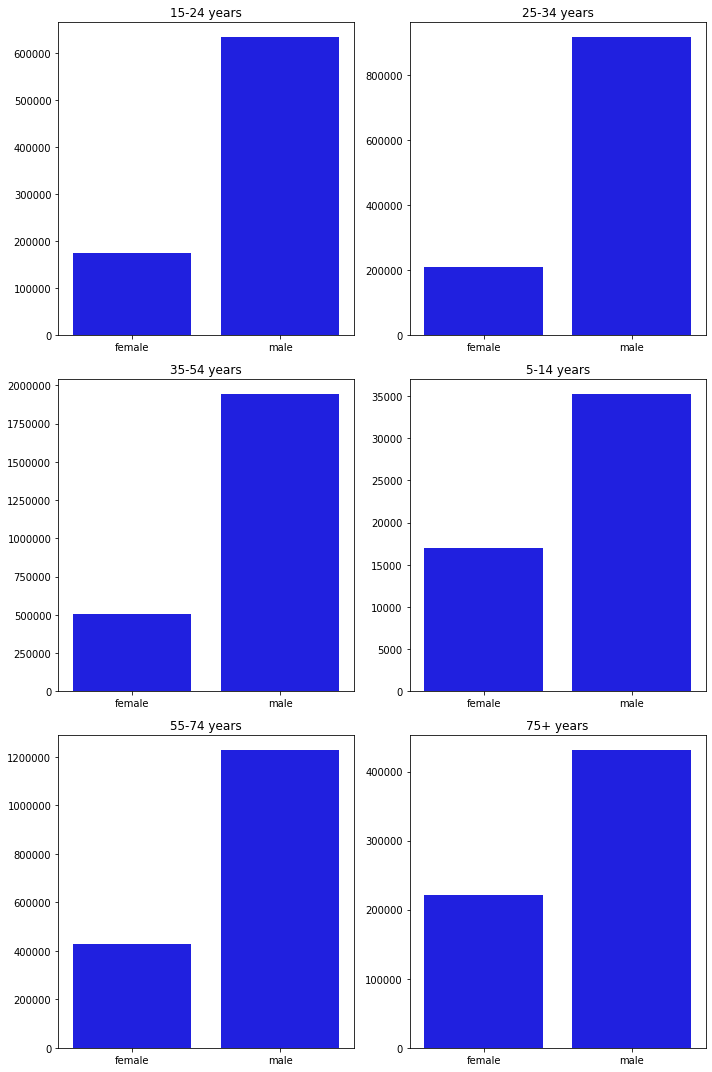

In [30]:
female_=[175437,208823,506233,16997,430036,221984]
male_=[633105,915089,1945908,35267,1228407,431134]

plot_id = 0

for i,age in enumerate(['15-24 years','25-34 years','35-54 years','5-14 years','55-74 years','75+ years']):
    plot_id += 1
    plt.subplot(3,2,plot_id)
    plt.title(age)
    fig, ax = plt.gcf(), plt.gca()
    sns.barplot(x=['female','male'],y=[female_[i],male_[i]],color='blue')
    plt.tight_layout()
    fig.set_size_inches(10, 15)
    
plt.show() 

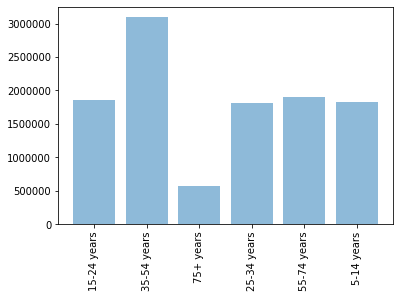

In [33]:
index_population=[]

for age in data['Age'].unique():
    index_population.append(sum(data[data['Age']==age].Population)/len(data[data['Age']==age].Population))
    
plt.bar(['15-24 years','35-54 years','75+ years','25-34 years','55-74 years','5-14 years'],index_population,align='center',alpha=0.5)
plt.xticks(rotation=90)
plt.show()

In [34]:
index_population

[1861901.5286514433,
 3096916.8726841877,
 573735.728780698,
 1817773.284575614,
 1896433.7225333909,
 1821842.3507592191]

**boxplotting some attributes**

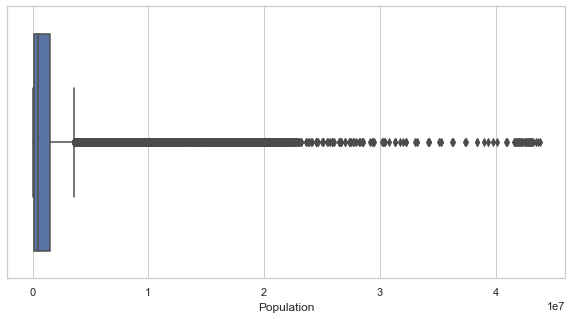

In [35]:
plt.figure(figsize=(10,5))
sns.set(style='whitegrid')
sns.boxplot(data['Population'])
plt.show()

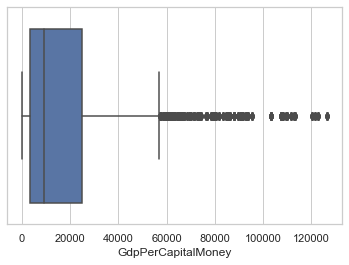

In [36]:
sns.set(style='whitegrid')
sns.boxplot(data['GdpPerCapitalMoney'])
plt.show()

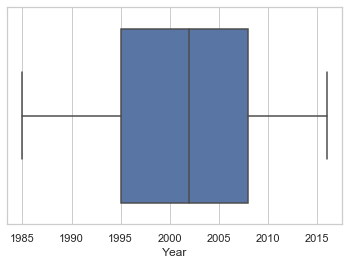

In [37]:
sns.set(style='whitegrid')
sns.boxplot(data.Year)
plt.show()

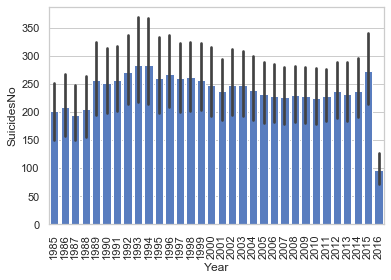

In [38]:
sns.set_color_codes("muted")
sns.barplot(x="Year", y="SuicidesNo", data=data, label="Year Suicides", color="b")
plt.xticks(rotation=90)
plt.show()

**Generation Counter**

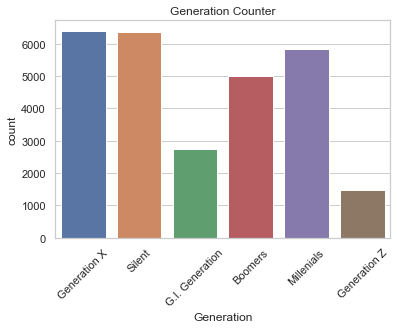

In [40]:
sns.countplot(data.Generation)
plt.title('Generation Counter')
plt.xticks(rotation=45)

plt.show()

**Suicides no according to generation**

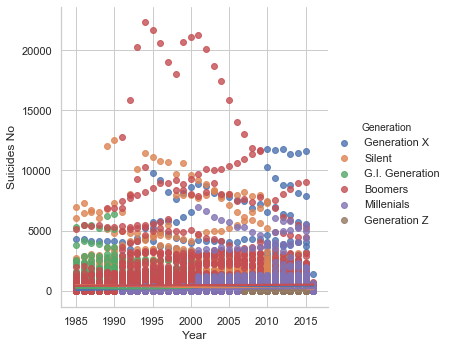

In [39]:
# Plot sepal with as a function of sepal_length across days
g = sns.lmplot(x="Year", y="SuicidesNo", hue="Generation",
               truncate=True, height=5, data=data)

# Use more informative axis labels than are provided by default
g.set_axis_labels("Year", "Suicides No")
plt.show()

In [ ]:
# data.describe().plot(kind = "area",fontsize=15, figsize = (20,10), table = True,colormap="rainbow")
# plt.xlabel('Statistics',)
# plt.ylabel('Value')
# plt.title("General Statistics")
# plt.show()

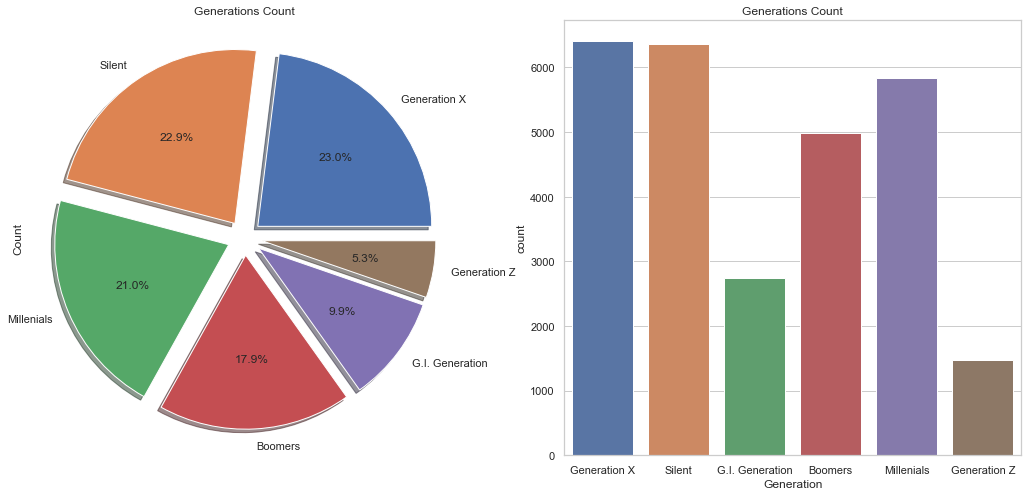

In [45]:
f,ax=plt.subplots(1,2,figsize=(18,8))

data['Generation'].value_counts().plot.pie(explode=[0.1,0.1,0.1,0.1,0.1,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)

ax[0].set_title('Generations Count')
ax[0].set_ylabel('Count')
sns.countplot('Generation',data=data,ax=ax[1])
ax[1].set_title('Generations Count')

plt.show()

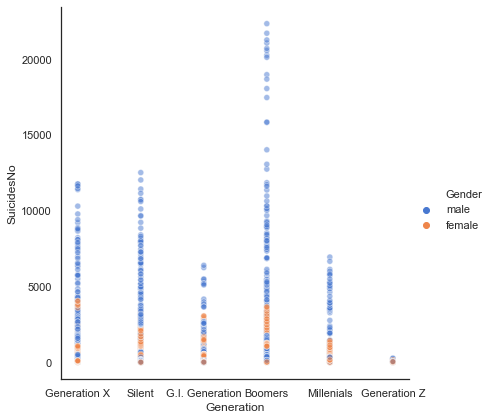

In [46]:
sns.set(style="white")

sns.relplot(x="Generation",y="SuicidesNo",hue="Gender", sizes=(40, 400), alpha=.5, palette="muted", height=6, data=data)
plt.show()

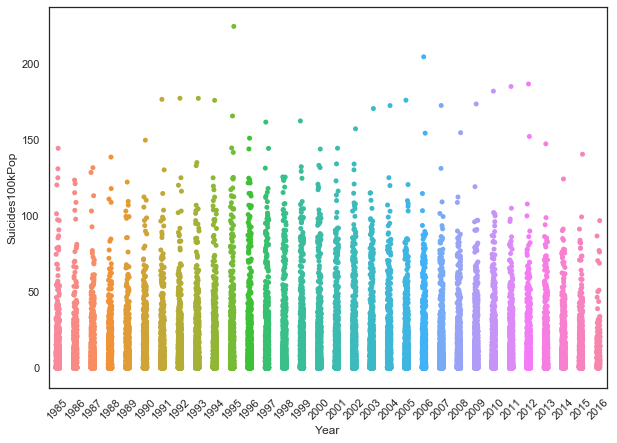

In [49]:
plt.figure(figsize=(10,7))
sns.stripplot(x="Year",y='Suicides100kPop',data=data)
plt.xticks(rotation=45)
plt.show()

In [ ]:
# plt.figure(figsize=(10,10))
# sns.factorplot(x="SuicidesNo", y="Gender", kind='violin',data=data)
# plt.show()

**pairplot of generation and gender**

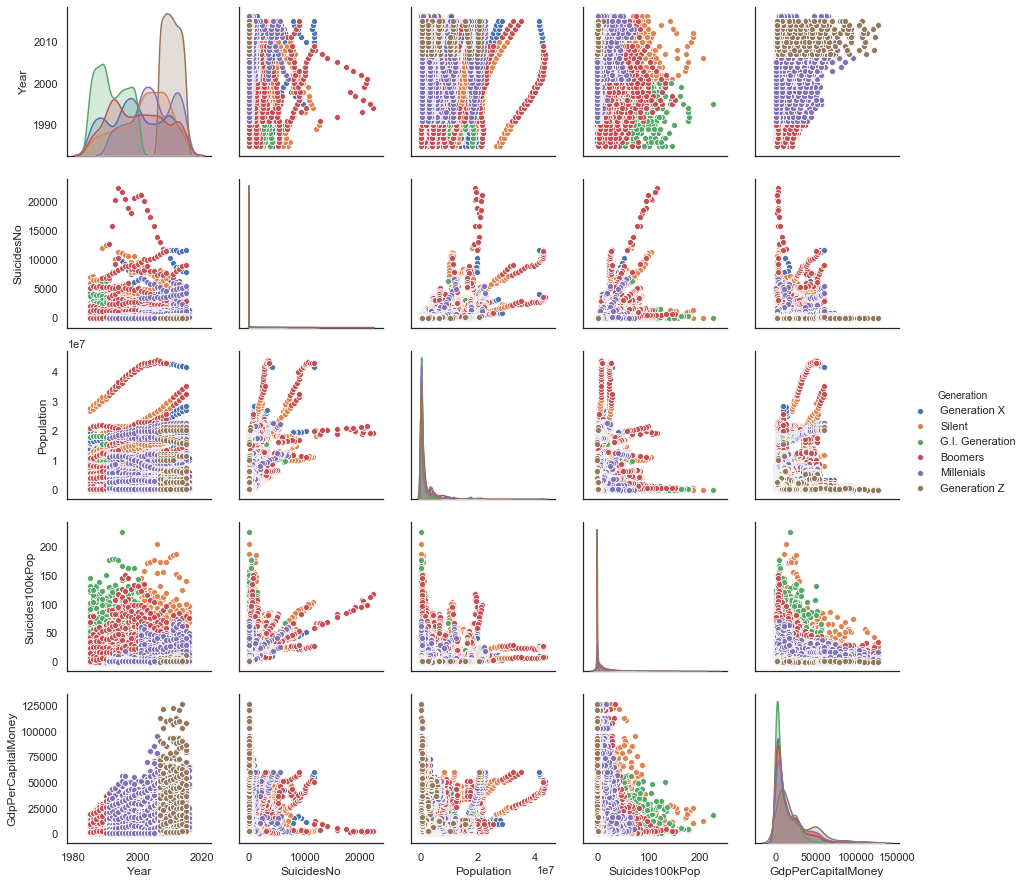

In [51]:
sns.pairplot(data,hue='Generation')
plt.show()

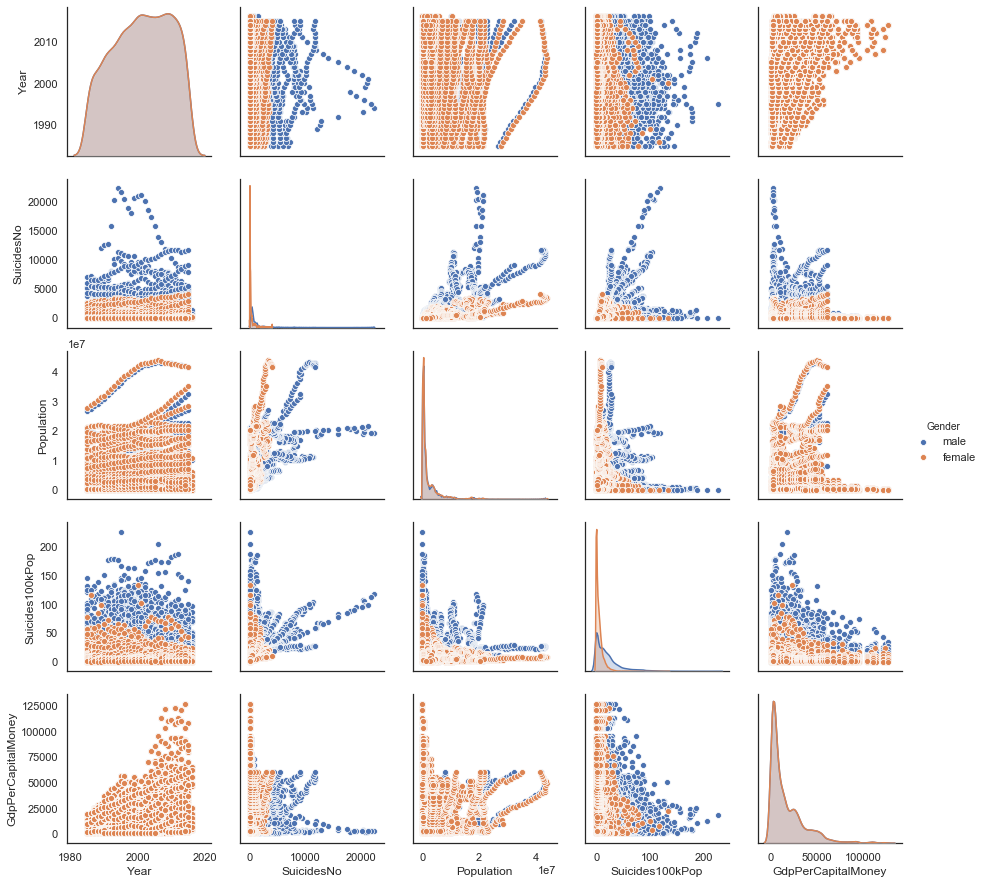

In [52]:
sns.pairplot(data, hue="Gender")
plt.show()

**correlation**

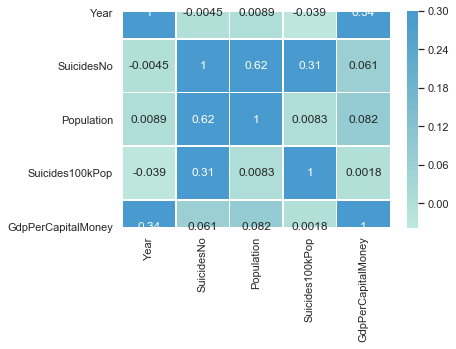

In [53]:
sns.heatmap(data.corr(), vmax=.3, center=1, square=True, linewidths=.5,annot=True)
plt.show()

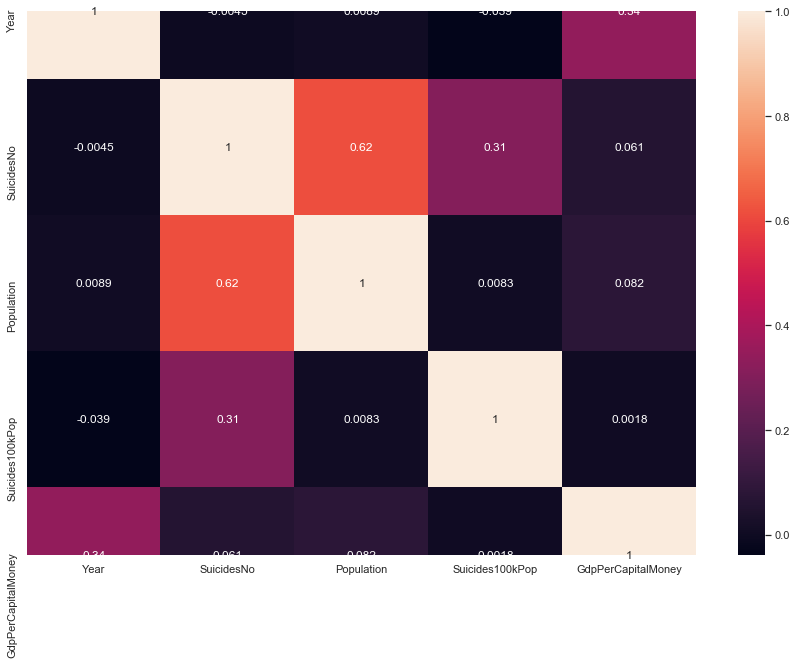

In [65]:
plt.figure(figsize=(15,10))
cor = sns.heatmap(data.corr(), annot = True)

**most suicides in country**

In [55]:
data[data.SuicidesNo==max(data.SuicidesNo)]

Country  Year Gender          Age  SuicidesNo  Population  \
20996  Russian Federation  1994   male  35-54 years       22338    19044200   

       Suicides100kPop             CountryYear  GdpForYearMoney  \
20996            117.3  Russian Federation1994  395,077,301,248   

       GdpPerCapitalMoney Generation  
20996                2853    Boomers

**looking at some info of Russia and UK**

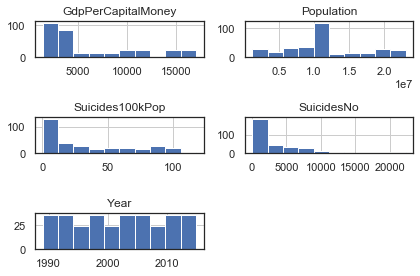

In [56]:
data[data['Country']=='Russian Federation'].hist()
plt.tight_layout()
plt.show()

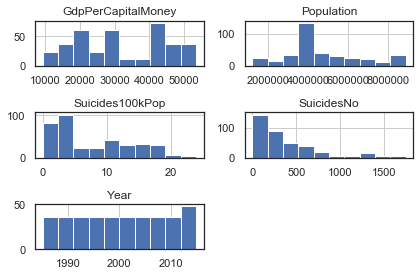

In [59]:
data[data['Country']=='United Kingdom'].hist()
plt.tight_layout()
plt.show()

**countries with minimum suicide data**

In [24]:
data[data.SuicidesNo==min(data.SuicidesNo)]

Country  Year  Gender          Age  SuicidesNo  Population  \
9      Albania  1987  female   5-14 years           0      311000   
10     Albania  1987  female  55-74 years           0      144600   
11     Albania  1987    male   5-14 years           0      338200   
22     Albania  1988  female   5-14 years           0      317200   
23     Albania  1988    male   5-14 years           0      345000   
...        ...   ...     ...          ...         ...         ...   
27363  Uruguay  1998  female   5-14 years           0      262973   
27459  Uruguay  2006  female   5-14 years           0      260187   
27471  Uruguay  2007  female   5-14 years           0      257931   
27495  Uruguay  2009    male   5-14 years           0      263516   
27543  Uruguay  2014  female   5-14 years           0      243247   

       Suicides100kPop  CountryYear  HDIForYear GdpForYearMoney  \
9                  0.0  Albania1987         NaN   2,156,624,900   
10                 0.0  Albania1987         NaN   2,156,624,900   
11                 0.0  Albania1987         NaN   2,156,624,900   
22                 0.0  Albania1988         NaN   2,126,000,000   
23                 0.0  Albania1988         NaN   2,126,000,000   
...                ...          ...         ...             ...   
27363              0.0  Uruguay1998         NaN  25,385,928,198   
27459              0.0  Uruguay2006         NaN  19,579,457,966   
27471              0.0  Uruguay2007         NaN  23,410,572,634   
27495              0.0  Uruguay2009         NaN  31,660,911,277   
27543              0.0  Uruguay2014       0.793  57,236,013,086   

       GdpPerCapitalMoney       Generation  
9                     796     Generation X  
10                    796  G.I. Generation  
11                    796     Generation X  
22                    769     Generation X  
23                    769     Generation X  
...                   ...              ...  
27363                8420       Millenials  
27459                6362       Millenials  
27471                7581     Generation Z  
27495               10166     Generation Z  
27543               18012     Generation Z  

[4281 rows x 12 columns]

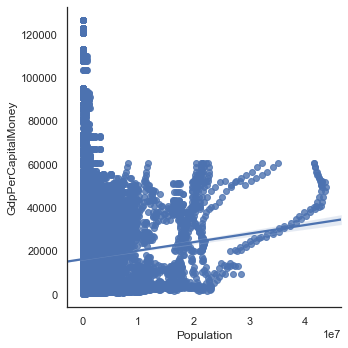

In [60]:
# Showing the results of a linear regression

sns.lmplot(x="Population", y="GdpPerCapitalMoney", data=data)
plt.show()

#### checking which age of people suicide most

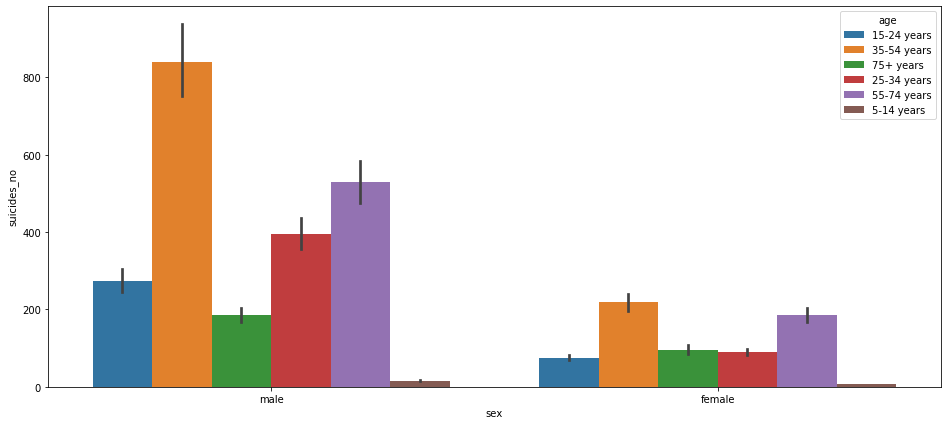

In [3]:
plt.figure(figsize=(16,7))

bar_age = sns.barplot(x = 'sex', y = 'suicides_no', hue = 'age',data = data)

Accorrding to the barplot 35-54 year people suicides the most

#### checking which generation of people suicide most

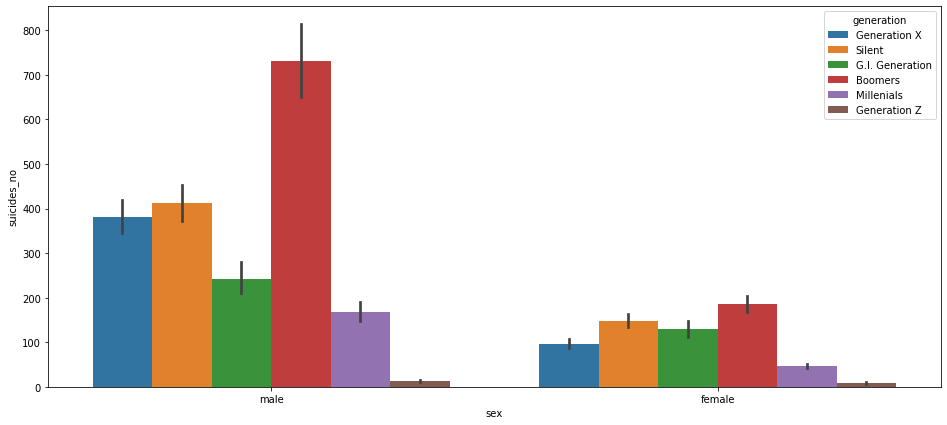

In [4]:
plt.figure(figsize=(16,7))
bar_gen = sns.barplot(x = 'sex', y = 'suicides_no', hue = 'generation',data = data)

According to the bar plot Boomers generaton's people suicides the most

#### let's create the catplot which shows the number of suicide for both male and female of different age groups since 1985 to 2016

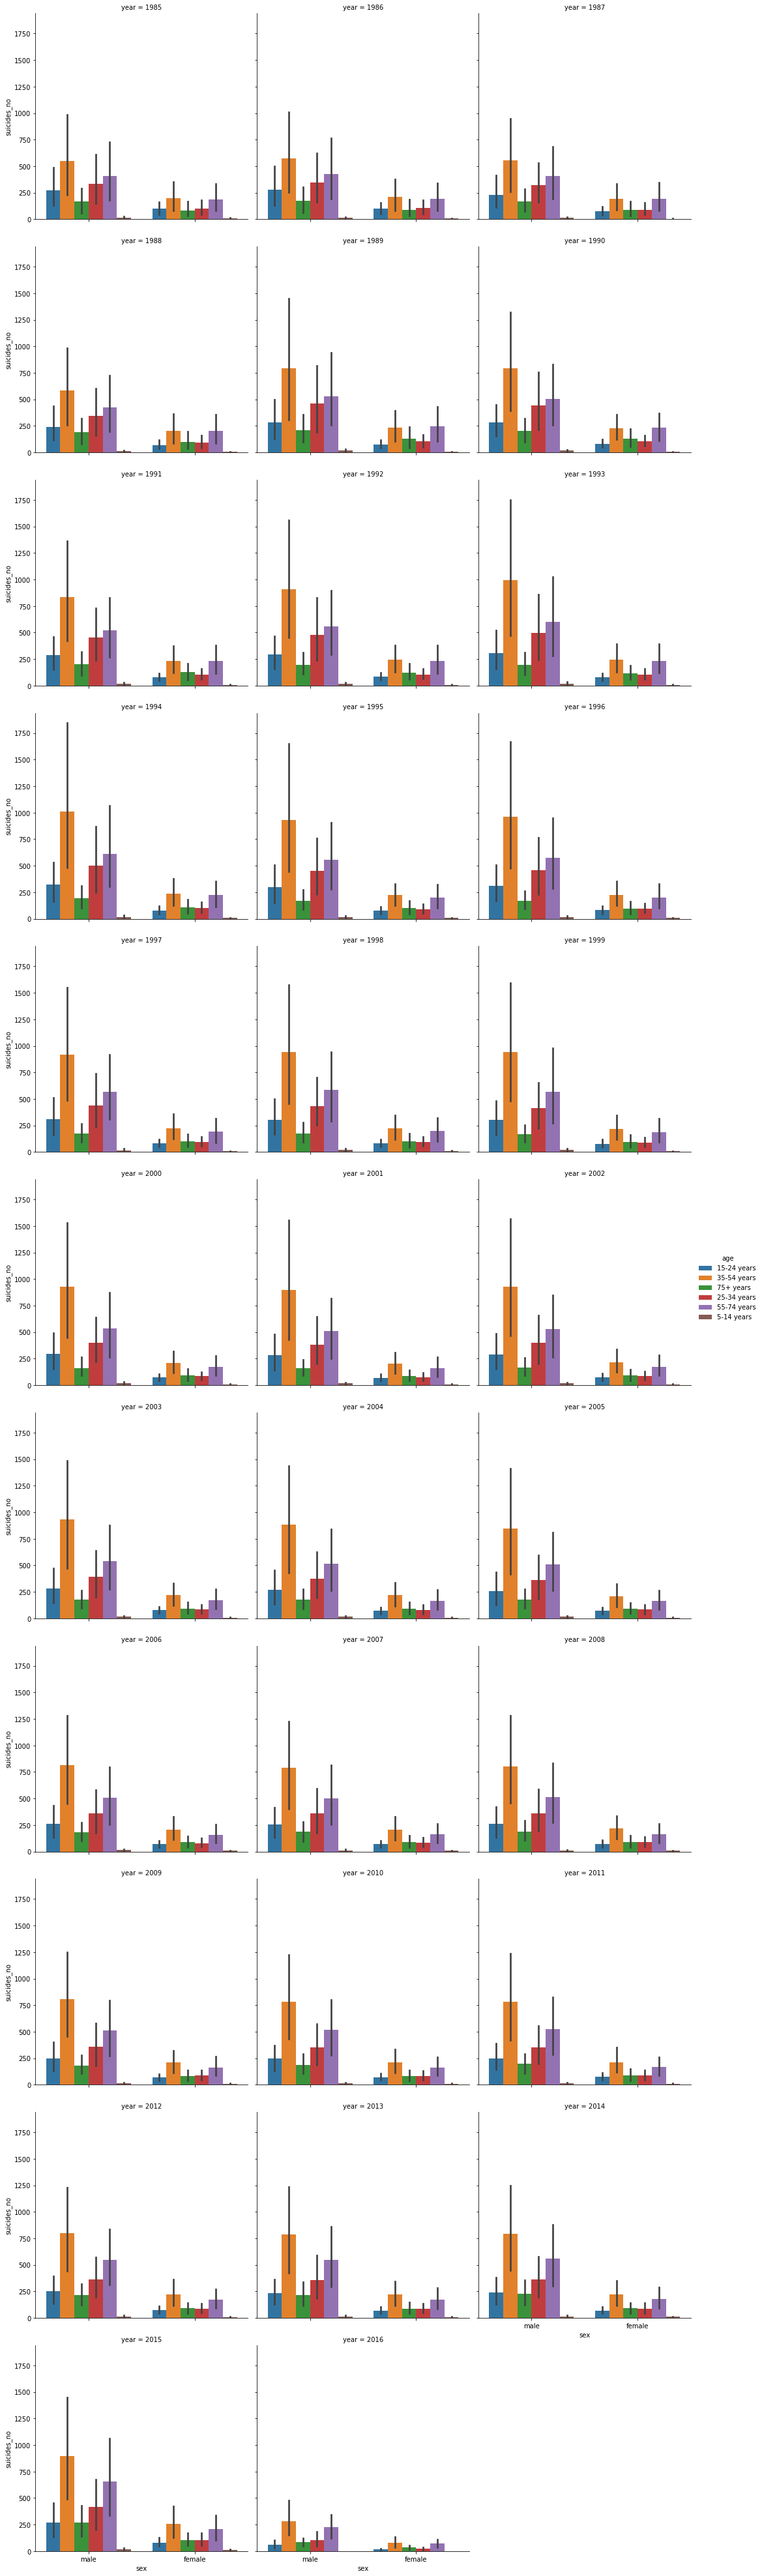

In [5]:
cat_accord_year = sns.catplot('sex','suicides_no',hue='age',col='year',data=data,kind='bar',col_wrap=3)

#### let's create the lineplot to see suicides numbers according to year with age group

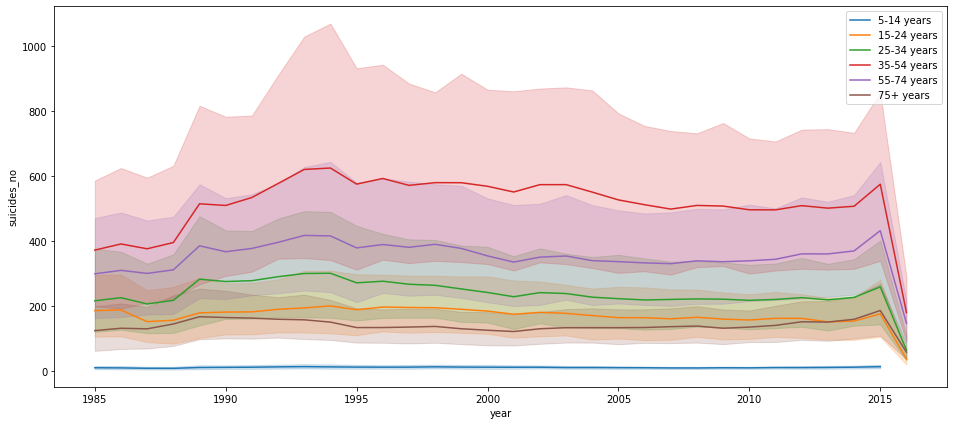

In [6]:
age_5 = data.loc[data.loc[:, 'age']=='5-14 years',:]
age_15 = data.loc[data.loc[:, 'age']=='15-24 years',:]
age_25 = data.loc[data.loc[:, 'age']=='25-34 years',:]
age_35 = data.loc[data.loc[:, 'age']=='35-54 years',:]
age_55 = data.loc[data.loc[:, 'age']=='55-74 years',:]
age_75 = data.loc[data.loc[:, 'age']=='75+ years',:]

plt.figure(figsize=(16,7))

age_5_lp = sns.lineplot(x='year', y='suicides_no', data=age_5)
age_15_lp = sns.lineplot(x='year', y='suicides_no', data=age_15)
age_25_lp = sns.lineplot(x='year', y='suicides_no', data=age_25)
age_35_lp = sns.lineplot(x='year', y='suicides_no', data=age_35)
age_55_lp = sns.lineplot(x='year', y='suicides_no', data=age_55)
age_75_lp = sns.lineplot(x='year', y='suicides_no', data=age_75)

# Now making the legend
leg = plt.legend(['5-14 years', '15-24 years', '25-34 years', '35-54 years', '55-74 years', '75+ years'])

#### making a lineplot for male and female population

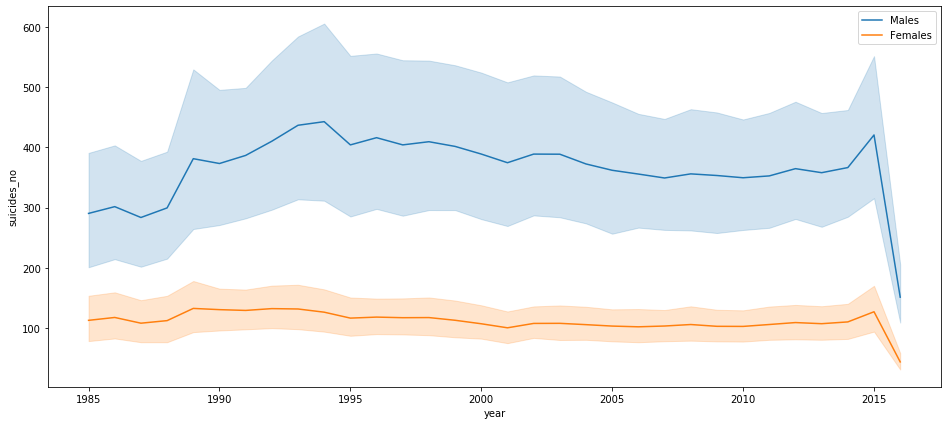

In [7]:
male_population = data.loc[data.loc[:, 'sex']=='male',:]
female_population = data.loc[data.loc[:, 'sex']=='female',:]

plt.figure(figsize=(16,7))

lp_male = sns.lineplot(x = 'year' , y = 'suicides_no' , data = male_population)
lp_female = sns.lineplot(x = 'year' , y = 'suicides_no' , data = female_population)
leg1 = plt.legend(['Males','Females'])

#### In which year did the most suicides occur

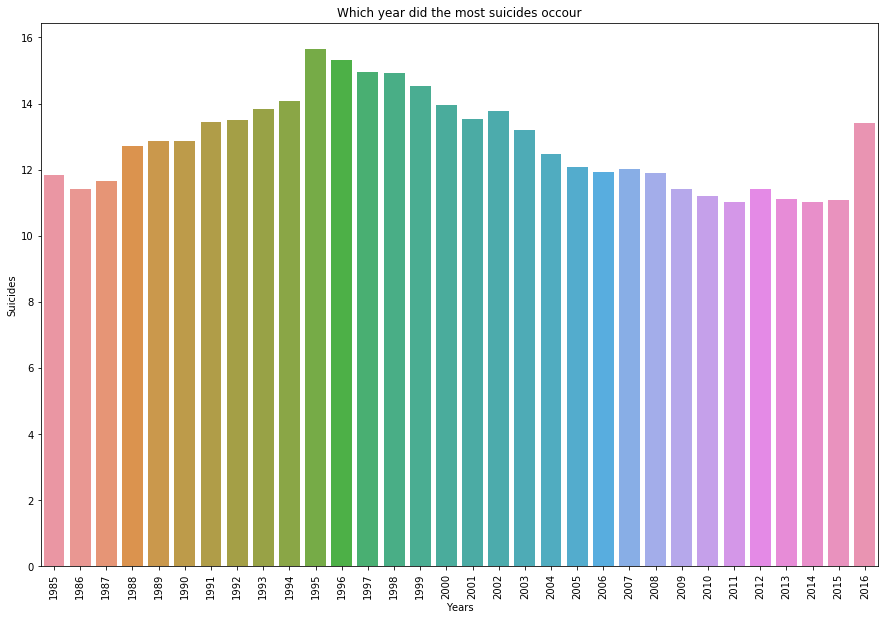

In [10]:
year_list=list(data.year.unique())
year_suicide_ratio=[]
for i in year_list:
    a=data[data['year']==i]
    year_suicide_rate=sum(a['suicides/100k pop'])/len(a)
    year_suicide_ratio.append(year_suicide_rate)
data=pd.DataFrame({'year_list':year_list,'year_suicide_ratio':year_suicide_ratio})
new_index=(data['year_suicide_ratio'].sort_values(ascending=True)).index.values
sorted_data=data.reindex(new_index)


# visualization
plt.figure(figsize=(15,10))
sns.barplot(x=sorted_data['year_list'],y=sorted_data['year_suicide_ratio'])
plt.xticks(rotation=90)
plt.xlabel('Years')
plt.ylabel('Suicides')
plt.title('Which year did the most suicides occour')
plt.show()

**looking at the suicide data at Canada**

In [20]:
data[data['Country'] == 'Canada'].sample(20)

Country  Year  Gender          Age  SuicidesNo  Population  \
5070  Canada  1997    male   5-14 years          39     2084500   
5227  Canada  2010  female   5-14 years          13     1820274   
4976  Canada  1990    male    75+ years         149      459600   
4943  Canada  1987    male  35-54 years         874     3179200   
5254  Canada  2013    male  55-74 years         812     3724622   
5155  Canada  2004  female   5-14 years          11     1971134   
4968  Canada  1989    male  35-54 years         850     3366100   
5111  Canada  2001    male  55-74 years         481     2458947   
4924  Canada  1985  female    75+ years          34      642900   
4991  Canada  1991    male  35-54 years         974     3663400   
5136  Canada  2003    male  15-24 years         409     2211023   
5223  Canada  2010  female  25-34 years         154     2335884   
4997  Canada  1991  female    75+ years          31      795900   
5041  Canada  1995  female  35-54 years         363     4287400   
5042  Canada  1995  female  55-74 years         157     2403700   
4961  Canada  1988  female  15-24 years          96     1968700   
5072  Canada  1998    male  35-54 years        1226     4637556   
4996  Canada  1991  female  15-24 years          76     1886900   
5019  Canada  1993  female  55-74 years         146     2348500   
5012  Canada  1993    male  35-54 years        1141     4049700   

      Suicides100kPop CountryYear  HDIForYear    GdpForYearMoney  \
5070             1.87  Canada1997         NaN    652,825,364,726   
5227             0.71  Canada2010       0.903  1,613,464,422,811   
4976            32.42  Canada1990       0.849    593,929,550,908   
4943            27.49  Canada1987         NaN    431,316,742,081   
5254            21.80  Canada2013       0.912  1,842,628,005,830   
5155             0.56  Canada2004         NaN  1,023,196,003,075   
4968            25.25  Canada1989         NaN    565,055,743,243   
5111            19.56  Canada2001         NaN    736,379,777,893   
4924             5.29  Canada1985       0.827    364,756,499,451   
4991            26.59  Canada1991         NaN    610,328,183,643   
5136            18.50  Canada2003         NaN    892,380,986,368   
5223             6.59  Canada2010       0.903  1,613,464,422,811   
4997             3.89  Canada1991         NaN    610,328,183,643   
5041             8.47  Canada1995       0.861    604,031,623,433   
5042             6.53  Canada1995       0.861    604,031,623,433   
4961             4.88  Canada1988         NaN    507,354,351,182   
5072            26.44  Canada1998         NaN    631,813,279,407   
4996             4.03  Canada1991         NaN    610,328,183,643   
5019             6.22  Canada1993         NaN    577,170,761,956   
5012            28.17  Canada1993         NaN    577,170,761,956   

      GdpPerCapitalMoney       Generation  
5070               23245       Millenials  
5227               49974     Generation Z  
4976               24041  G.I. Generation  
4943               18124           Silent  
5254               55310          Boomers  
5155               33787       Millenials  
4968               23188           Silent  
5111               25165           Silent  
4924               15522  G.I. Generation  
4991               24038          Boomers  
5136               29787       Millenials  
5223               49974     Generation X  
4997               24038  G.I. Generation  
5041               21871          Boomers  
5042               21871           Silent  
4961               21069     Generation X  
5072               22268          Boomers  
4996               24038     Generation X  
5019               21421           Silent  
5012               21421          Boomers

In [21]:
data['Age'].value_counts()

75+ years      4642
55-74 years    4642
15-24 years    4642
35-54 years    4642
25-34 years    4642
5-14 years     4610
Name: Age, dtype: int64

**Finding Suicide Trends according to Year**

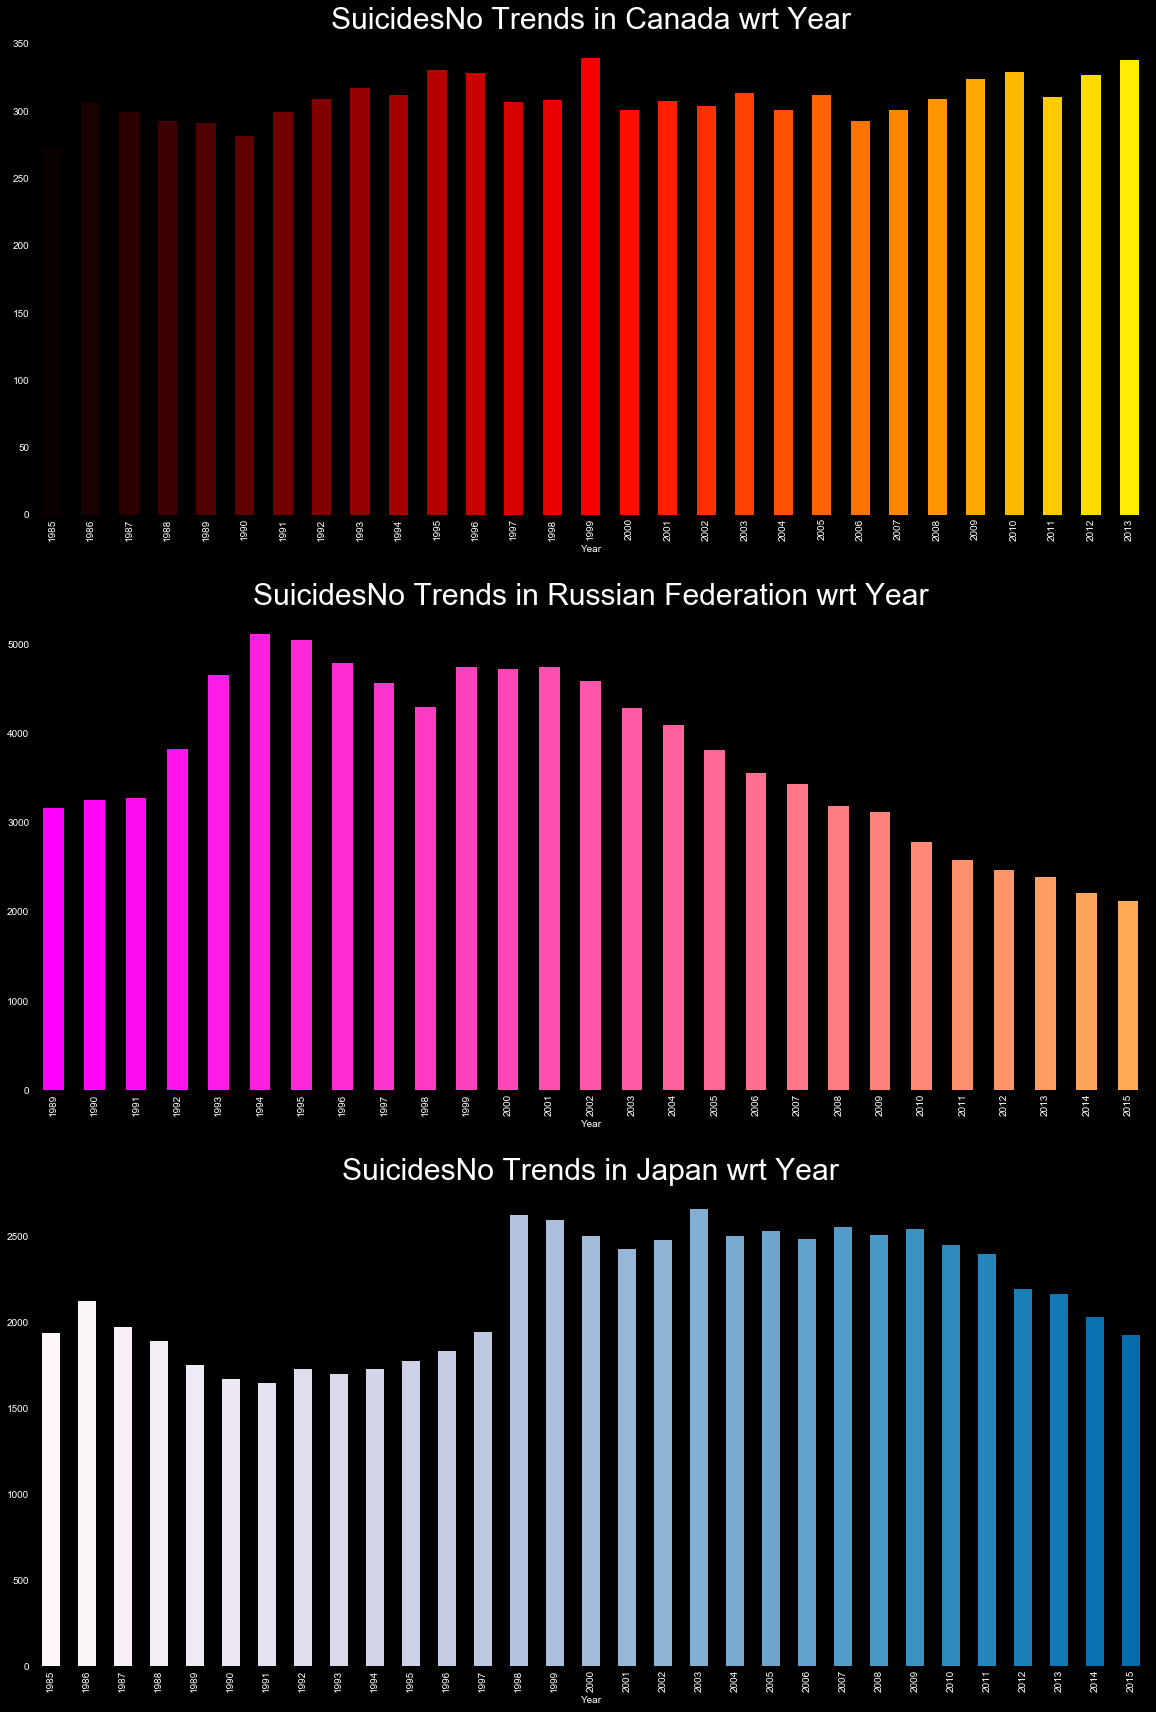

In [22]:
df = data.groupby(['Country', 'Year'])['SuicidesNo'].mean()
df = pd.DataFrame(df)

# looking at the SuicidesNo trends for any 3 countries
plt.rcParams['figure.figsize'] = (20, 30)
plt.style.use('dark_background')

plt.subplot(3, 1, 1)
color = plt.cm.hot(np.linspace(0, 1, 40))
df['SuicidesNo']['Canada'].plot.bar(color = color)
plt.title('SuicidesNo Trends in Canada wrt Year', fontsize = 30)

plt.subplot(3, 1, 2)
color = plt.cm.spring(np.linspace(0, 1, 40))
df['SuicidesNo']['Russian Federation'].plot.bar(color = color)
plt.title('SuicidesNo Trends in Russian Federation wrt Year', fontsize = 30)

plt.subplot(3, 1, 3)
color = plt.cm.PuBu(np.linspace(0, 1, 40))
df['SuicidesNo']['Japan'].plot.bar(color = color)
plt.title('SuicidesNo Trends in Japan wrt Year', fontsize = 30)

plt.show()

**Finding Suicide Trends according to Age Groups**

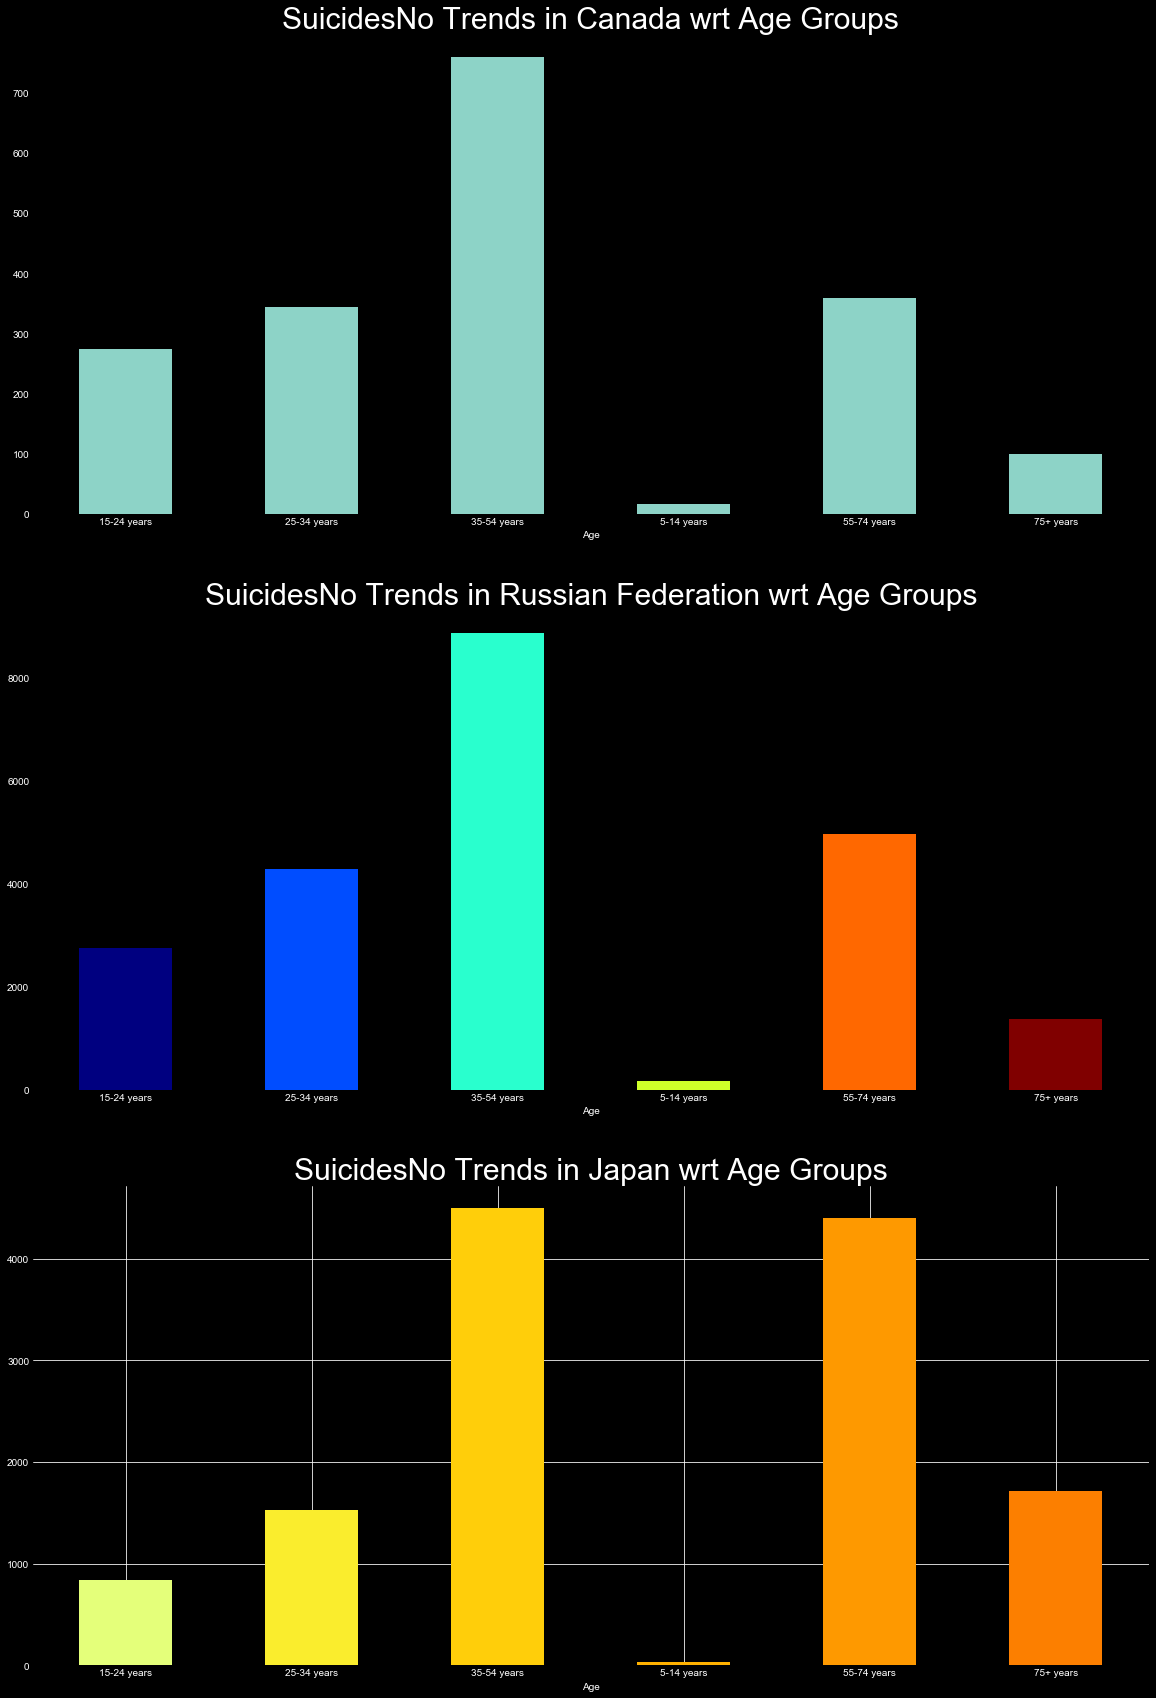

In [23]:
df2 = data.groupby(['Country', 'Age'])['SuicidesNo'].mean()
df2 = pd.DataFrame(df2)

# looking at the SuicidesNo trends for any 3 countries
plt.rcParams['figure.figsize'] = (20, 30)

plt.subplot(3, 1, 1)
df2['SuicidesNo']['Canada'].plot.bar()
plt.title('SuicidesNo Trends in Canada wrt Age Groups', fontsize = 30)
plt.xticks(rotation = 0)

plt.subplot(3, 1, 2)
color = plt.cm.jet(np.linspace(0, 1, 6))
df2['SuicidesNo']['Russian Federation'].plot.bar(color = color)
plt.title('SuicidesNo Trends in Russian Federation wrt Age Groups', fontsize = 30)
plt.xticks(rotation = 0)

plt.subplot(3, 1, 3)
color = plt.cm.Wistia(np.linspace(0, 1, 6))
df2['SuicidesNo']['Japan'].plot.bar(color = color)
plt.title('SuicidesNo Trends in Japan wrt Age Groups', fontsize = 30)
plt.xticks(rotation = 0)

plt.grid()
plt.show()